In [ ]:
import numpy as np
import pandas as pd


LOADING DATASET

In [ ]:
df = pd.read_csv("/content/CarPrice_Assignment.csv")

In [ ]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [ ]:
df.drop("car_ID",axis=1, inplace=True)

Checking dataset size, info

In [ ]:
print("Dataset dimensions:", df.shape)
df.info()

Dataset dimensions: (205, 25)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem    

Null values checking and treatment

In [ ]:
df.isnull().sum()


,0
car_ID,0
symboling,0
CarName,0
fueltype,0
aspiration,0
doornumber,0
carbody,0
drivewheel,0
enginelocation,0
wheelbase,0


Descriptive statistics

In [ ]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


Outlier checking and treatment

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: ylabel='enginesize'>

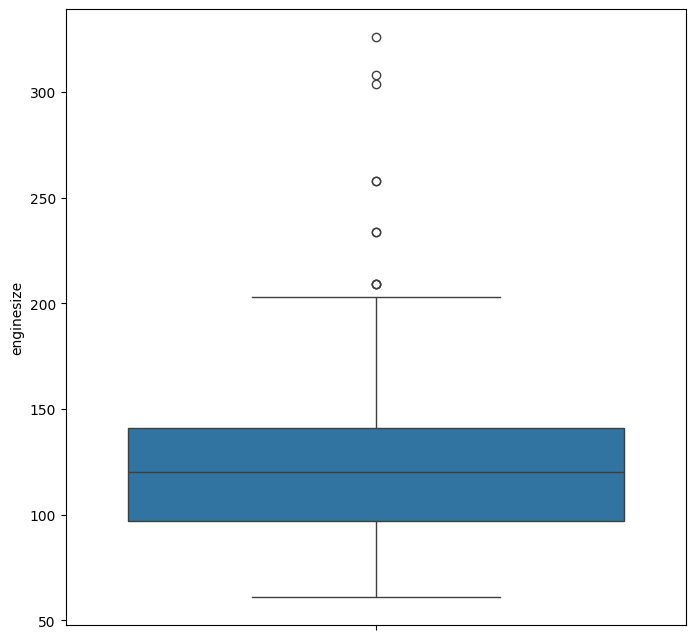

In [ ]:
sns.boxplot(df.enginesize)

In [ ]:
Q3 = df.enginesize.quantile(0.75)
Q1 = df.enginesize.quantile(0.25)

In [ ]:
Q3


141.0

In [ ]:
Q1

97.0

In [ ]:
IQR = Q3-Q1

In [ ]:
IQR

44.0

In [ ]:
Upper_limit = Q3+1.5*IQR
Upper_limit

207.0

In [ ]:
df['enginesize']=np.where(df['enginesize']>Upper_limit,207.0,df['enginesize'])

<Axes: ylabel='enginesize'>

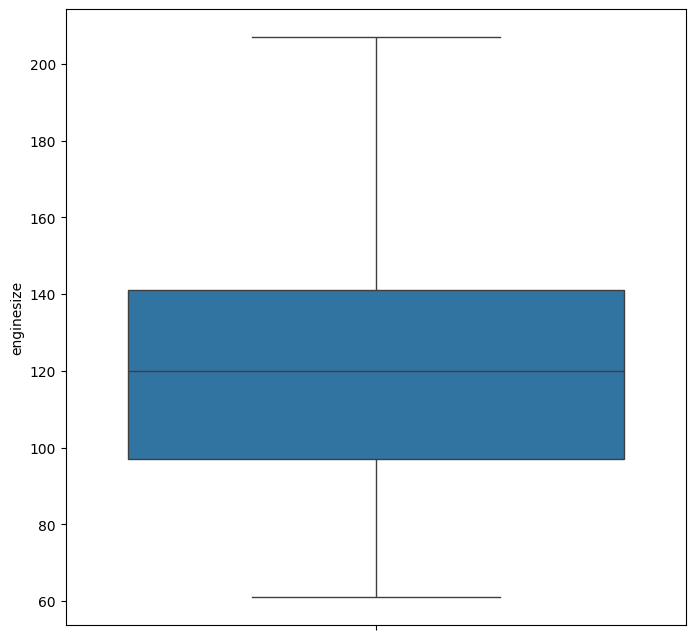

In [ ]:
sns.boxplot(df.enginesize)

Visualizations
1.Univariate Analysis

<ipython-input-21-7053edd65b83>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.price)


<Axes: xlabel='price', ylabel='Density'>

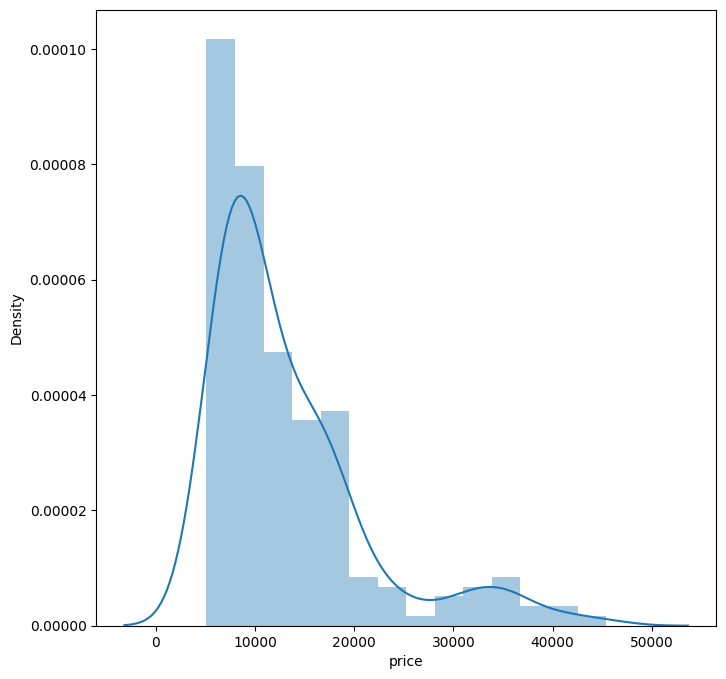

In [ ]:
sns.distplot(df.price)

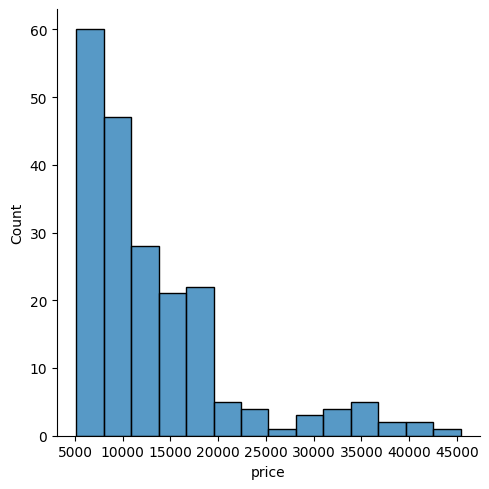

In [ ]:
sns.displot(df.price)

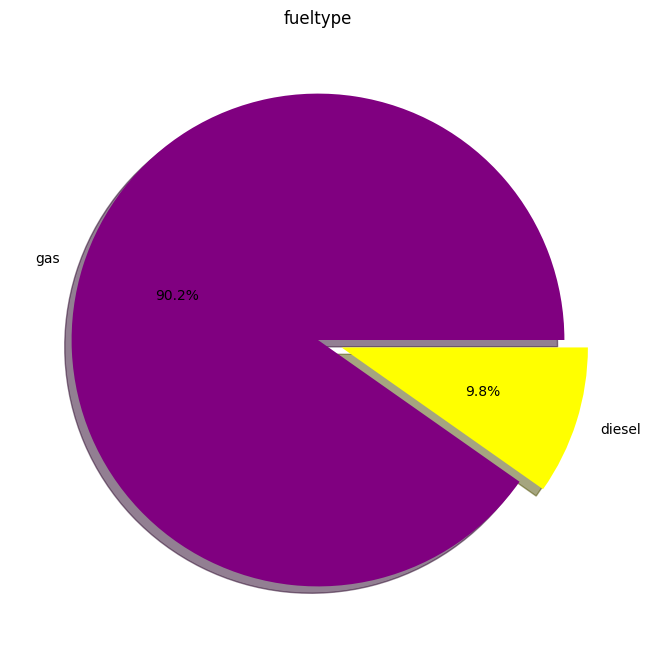

In [ ]:
plt.pie(df['fueltype'].value_counts(),[0,0.1],labels = ['gas','diesel'], autopct = '%1.1f%%',colors=['purple','yellow'],shadow = True)
plt.title('fueltype')
plt.show()


<ipython-input-24-f88f4f02fd20>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x =df['carbody'].value_counts().index, y =df['carbody'].value_counts(),palette ='husl')


<Axes: xlabel='carbody', ylabel='count'>

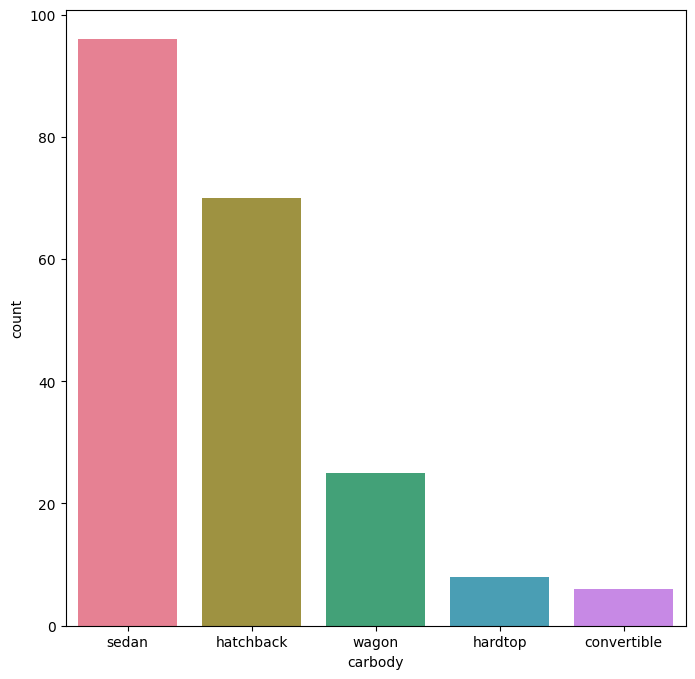

In [ ]:
from matplotlib import rcParams

rcParams['figure.figsize']=8,8
sns.barplot(x =df['carbody'].value_counts().index, y =df['carbody'].value_counts(),palette ='husl')

2.Bivartiate Analysis

<ipython-input-25-45b67602c9d2>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x = df['fueltype'],y = df['aspiration'], palette = 'Set1', data =df)


<Axes: xlabel='fueltype', ylabel='aspiration'>

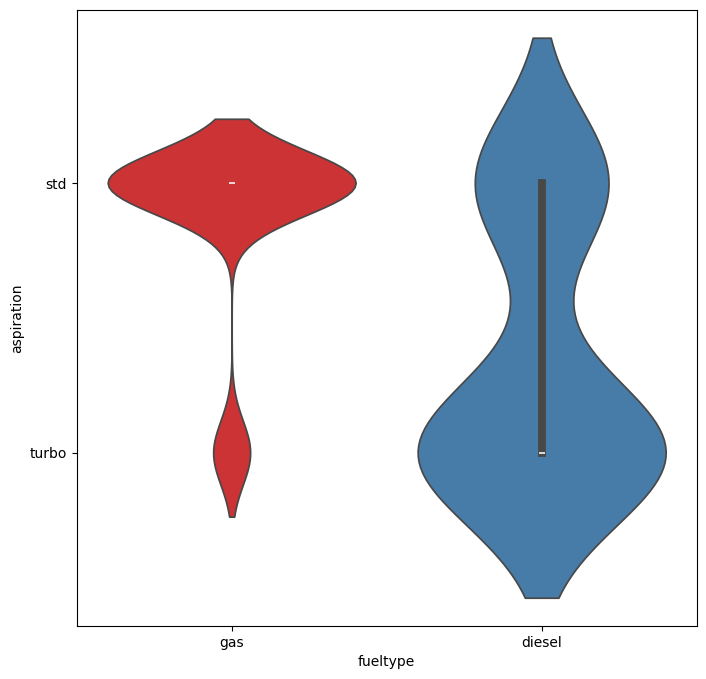

In [ ]:
sns.violinplot(x = df['fueltype'],y = df['aspiration'], palette = 'Set1', data =df)

<ipython-input-26-87b81ecf35a7>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='fueltype', y = 'enginesize',kind = 'box', data=df, palette='flare')


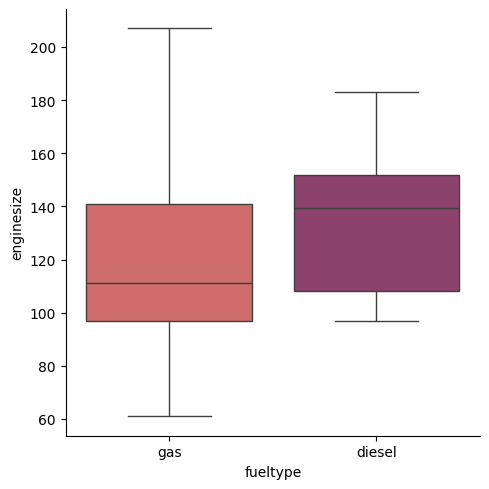

In [ ]:
sns.catplot(x='fueltype', y = 'enginesize',kind = 'box', data=df, palette='flare')

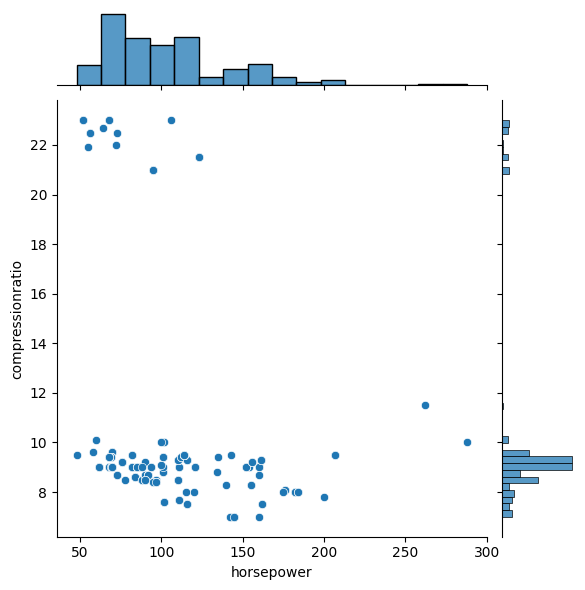

In [ ]:
sns.jointplot(x='horsepower',y='compressionratio',data=df)

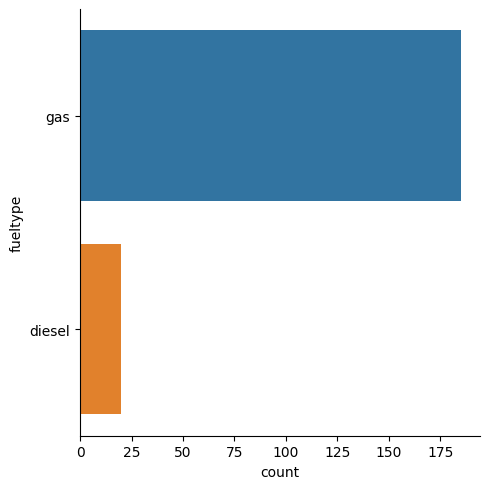

In [ ]:
sns.catplot(y ='fueltype',hue='fueltype',kind = 'count',data =df)

<Axes: xlabel='enginetype', ylabel='price'>

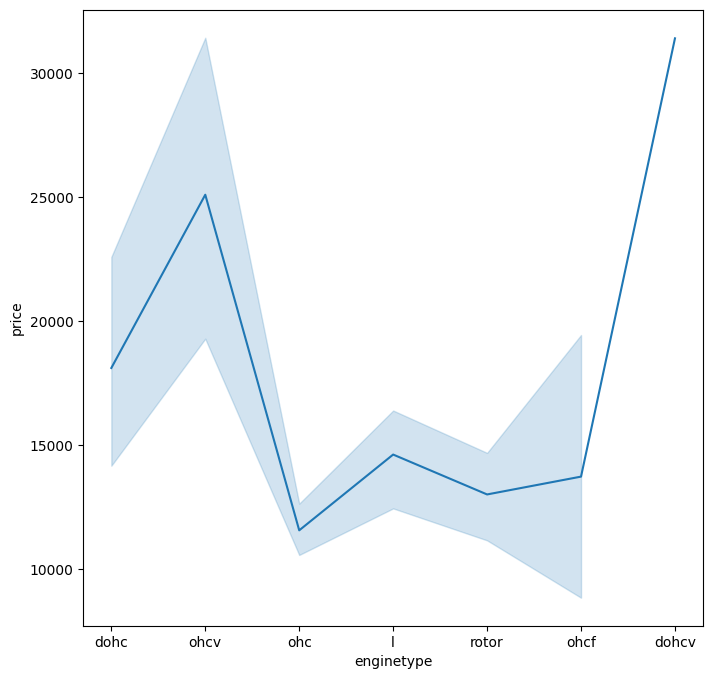

In [ ]:
sns.lineplot(x=df.enginetype,y=df.price)

3.Multivariate Analysis

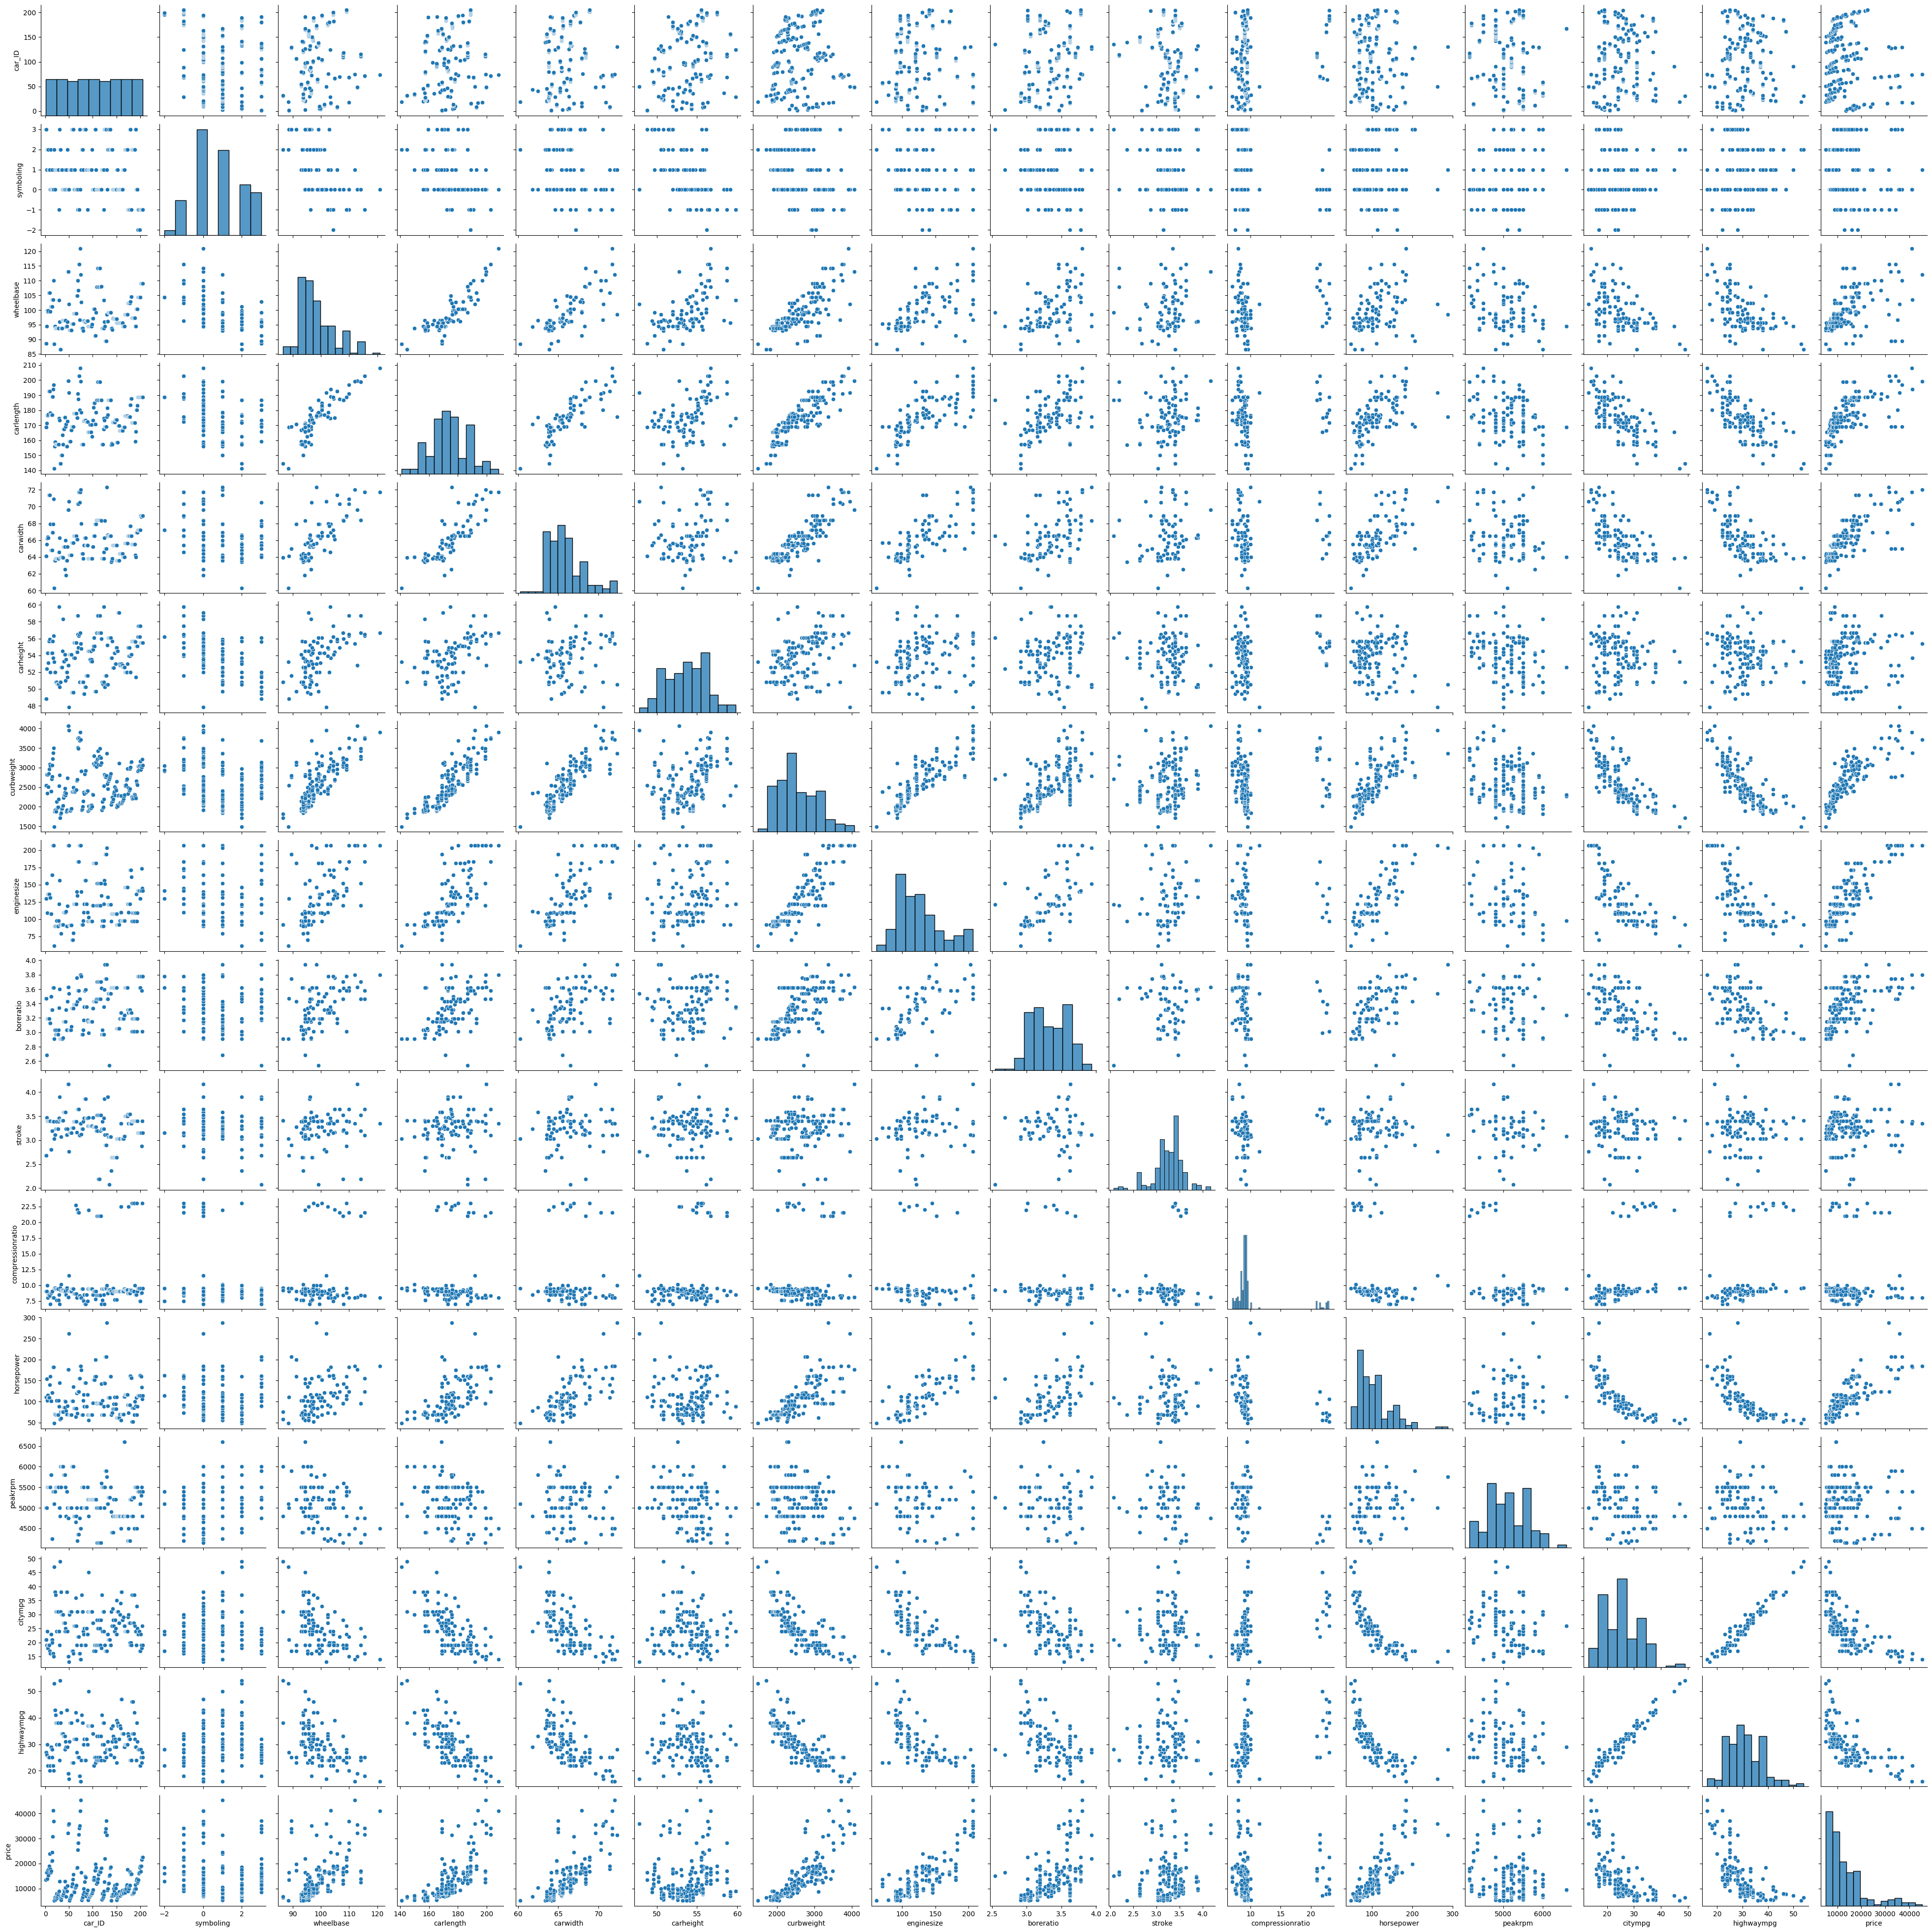

In [ ]:
sns.pairplot(df)

In [ ]:
numeric_columns = ['compressionratio', 'horsepower', 'price']
correlation_matrix = df[numeric_columns].corr()

In [ ]:
correlation_matrix


,compressionratio,horsepower,price
compressionratio,1.000000,-0.204326,0.067984
horsepower,-0.204326,1.000000,0.808139
price,0.067984,0.808139,1.000000


<Axes: >

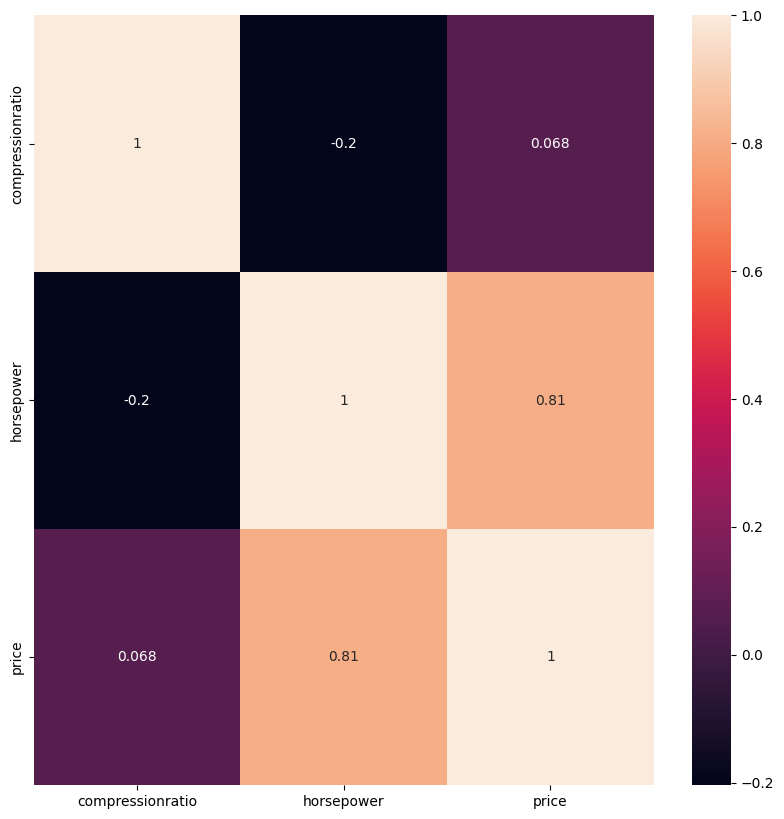

In [ ]:
plt.figure(figsize =(10,10))
sns.heatmap(correlation_matrix, annot =True)

 Transformation (Encoding)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
df['CarName'] = le.fit_transform(df['CarName'])
df['fueltype'] = le.fit_transform(df['fueltype'])
df['aspiration'] = le.fit_transform(df['aspiration'])
df['doornumber'] = le.fit_transform(df['doornumber'])
df['carbody'] = le.fit_transform(df['carbody'])
df['drivewheel'] = le.fit_transform(df['drivewheel'])
df['enginelocation'] = le.fit_transform(df['enginelocation'])
df['enginetype'] = le.fit_transform(df['enginetype'])
df['cylindernumber'] = le.fit_transform(df['cylindernumber'])
df['fuelsystem'] = le.fit_transform(df['fuelsystem'])

In [ ]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,2,1,0,1,0,2,0,88.6,...,130.0,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,3,1,0,1,0,2,0,88.6,...,130.0,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,1,1,0,1,2,2,0,94.5,...,152.0,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,4,1,0,0,3,1,0,99.8,...,109.0,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,5,1,0,0,3,0,0,99.4,...,136.0,5,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,139,1,0,0,3,2,0,109.1,...,141.0,5,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,138,1,1,0,3,2,0,109.1,...,141.0,5,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,140,1,0,0,3,2,0,109.1,...,173.0,5,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,142,0,1,0,3,2,0,109.1,...,145.0,3,3.01,3.40,23.0,106,4800,26,27,22470.0


In [ ]:
df.corr()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.967077,-0.125568,0.067729,-0.190352,0.098303,0.051406,0.051483,0.129729,...,0.006263,0.204898,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.107095,0.194311,-0.059866,0.664073,-0.596135,-0.041671,0.212471,-0.531954,...,-0.100869,0.091163,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
CarName,0.967077,-0.107095,1.000000,-0.069435,0.019914,-0.171745,0.099691,-0.016129,0.055968,0.014550,...,-0.114889,0.123845,0.188598,-0.181775,0.101730,-0.092131,-0.138309,0.093437,0.102895,-0.231439
fueltype,-0.125568,0.194311,-0.069435,1.000000,-0.401397,0.191491,-0.147853,-0.132257,0.040070,-0.308346,...,-0.107971,0.041529,-0.054451,-0.241829,-0.984356,0.163926,0.476883,-0.255963,-0.191392,-0.105679
aspiration,0.067729,-0.059866,0.019914,-0.401397,1.000000,-0.031792,0.063028,0.066465,-0.057191,0.257611,...,0.164998,0.288086,0.212614,0.222982,0.295541,0.241685,-0.183383,-0.202362,-0.254416,0.177926
doornumber,-0.190352,0.664073,-0.171745,0.191491,-0.031792,1.000000,-0.680358,0.098954,0.137757,-0.447357,...,-0.035490,0.015519,-0.119258,0.011082,-0.177888,0.126947,0.247668,0.012417,0.036330,-0.031835
carbody,0.098303,-0.596135,0.099691,-0.147853,0.063028,-0.680358,1.000000,-0.155745,-0.277009,0.401362,...,-0.074724,-0.065079,0.010549,-0.015325,0.136243,-0.153928,-0.109643,0.031697,-0.007170,-0.083976
drivewheel,0.051406,-0.041671,-0.016129,-0.132257,0.066465,0.098954,-0.155745,1.000000,0.147865,0.459745,...,0.558998,0.424686,0.481827,0.071591,0.127479,0.518686,-0.039417,-0.449581,-0.452220,0.577992
enginelocation,0.051483,0.212471,0.055968,0.040070,-0.057191,0.137757,-0.277009,0.147865,1.000000,-0.187790,...,0.249654,0.105971,0.185042,-0.138455,-0.019762,0.317839,0.198461,-0.153487,-0.102026,0.324973
wheelbase,0.129729,-0.531954,0.014550,-0.308346,0.257611,-0.447357,0.401362,0.459745,-0.187790,1.000000,...,0.558912,0.384601,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816


In [ ]:
df.corr()['price'].sort_values(ascending= False)

,price
price,1.000000
enginesize,0.854532
curbweight,0.835305
horsepower,0.808139
carwidth,0.759325
carlength,0.682920
drivewheel,0.577992
wheelbase,0.577816
boreratio,0.553173
fuelsystem,0.526823


X and y Split

In [ ]:
X = df.loc[:, ['curbweight', 'carwidth', 'carlength', 'enginesize', 'drivewheel', 'boreratio', 'fuelsystem', 'horsepower', 'wheelbase']]



In [ ]:
y= df['price']

In [ ]:
X.head()

,curbweight,carwidth,carlength,enginesize,drivewheel,boreratio,fuelsystem,horsepower,wheelbase
0,2548,64.1,168.8,130.0,2,3.47,5,111,88.6
1,2548,64.1,168.8,130.0,2,3.47,5,111,88.6
2,2823,65.5,171.2,152.0,2,2.68,5,154,94.5
3,2337,66.2,176.6,109.0,1,3.19,5,102,99.8
4,2824,66.4,176.6,136.0,0,3.19,5,115,99.4


In [ ]:
y.head()

,price
0,13495.0
1,16500.0
2,16500.0
3,13950.0
4,17450.0


Transformation (Scaling)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scale =MinMaxScaler()

In [ ]:
scaled_x = pd.DataFrame(scale.fit_transform(X),columns = X.columns)
scaled_x.head()

,curbweight,carwidth,carlength,enginesize,drivewheel,boreratio,fuelsystem,horsepower,wheelbase
0,0.411171,0.316667,0.413433,0.472603,1.0,0.664286,0.714286,0.262500,0.058309
1,0.411171,0.316667,0.413433,0.472603,1.0,0.664286,0.714286,0.262500,0.058309
2,0.517843,0.433333,0.449254,0.623288,1.0,0.100000,0.714286,0.441667,0.230321
3,0.329325,0.491667,0.529851,0.328767,0.5,0.464286,0.714286,0.225000,0.384840
4,0.518231,0.508333,0.529851,0.513699,0.0,0.464286,0.714286,0.279167,0.373178


Performing Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(scaled_x,y,test_size =0.2,random_state = 0)

In [ ]:
x_train.head()

,curbweight,carwidth,carlength,enginesize,drivewheel,boreratio,fuelsystem,horsepower,wheelbase
4,0.518231,0.508333,0.529851,0.513699,0.0,0.464286,0.714286,0.279167,0.373178
71,0.873545,0.950000,0.917910,1.000000,1.0,0.657143,0.714286,0.445833,0.845481
134,0.472847,0.516667,0.679104,0.410959,0.5,0.000000,0.714286,0.258333,0.364431
145,0.396431,0.425000,0.461194,0.321918,0.0,0.771429,0.714286,0.262500,0.303207
122,0.272692,0.291667,0.391045,0.253425,0.5,0.307143,0.142857,0.083333,0.206997


 Train the data with suitable ML model

In [ ]:
from sklearn.linear_model import LinearRegression
lr =LinearRegression()

In [ ]:
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(x_test)
y_pred

array([ 6271.58803427, 21890.44426701, 13580.89737139,  -885.30744576,
        9967.85354966, 15553.05452978,  6722.24233982,  4417.57543871,
       24894.84438123,  7743.81126299, 17061.3257812 , 39121.93769001,
       10473.73208445, 13068.81628779,  5946.30197945, 15156.67331617,
       11625.71802894, 18732.69971361, 10495.24448024,  5673.21164571,
       10993.53057625, 15770.66576925, 11508.85642866, 15661.44001788,
       23695.72219904,  5434.93739019,  7004.49779136, 15921.40529267,
        7131.46364884,  5881.83664968,  8593.34693424, 10673.35274442,
       20156.18862937, 10756.56444758,  6033.57633302, 27854.68929425,
        8449.52164558, 16340.84836621,  5945.26651284, 31925.07044387,
        5837.91649136])

Test the model

In [ ]:
x_test

,curbweight,carwidth,carlength,enginesize,drivewheel,boreratio,fuelsystem,horsepower,wheelbase
52,0.161753,0.325000,0.268657,0.205479,0.5,0.350000,0.142857,0.083333,0.189504
181,0.645074,0.516667,0.697015,0.684932,1.0,0.521429,0.714286,0.450000,0.521866
5,0.395268,0.500000,0.540299,0.513699,0.5,0.464286,0.714286,0.258333,0.384840
18,0.000000,0.000000,0.000000,0.000000,0.5,0.264286,0.142857,0.000000,0.052478
188,0.314973,0.433333,0.456716,0.328767,0.5,0.464286,0.714286,0.216667,0.311953
170,0.461986,0.441667,0.523881,0.582192,1.0,0.771429,0.714286,0.283333,0.344023
76,0.166796,0.341667,0.241791,0.212329,0.5,0.307143,0.142857,0.083333,0.206997
154,0.311094,0.275000,0.426866,0.212329,0.0,0.364286,0.142857,0.058333,0.265306
104,0.614042,0.633333,0.441791,0.821918,1.0,0.635714,0.714286,0.466667,0.137026
33,0.175330,0.308333,0.132836,0.212329,0.5,0.264286,0.000000,0.116667,0.206997


In [ ]:
y_test

,price
52,6795.0
181,15750.0
5,15250.0
18,5151.0
188,9995.0
170,11199.0
76,5389.0
154,7898.0
104,17199.0
33,6529.0


Testing with random values

In [ ]:
random_values = np.array([[0.5, 0.7, 0.3, 0.8, 0.9, 0.6, 0.5, 0.4, 0.7]])
lr.predict(random_values)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([23681.04745502])

In [ ]:
from sklearn import metrics

Evaluating the model

In [ ]:
# R-square

metrics.r2_score(y_test,y_pred)

0.747851891580747

In [ ]:
metrics.mean_squared_error(y_test,y_pred)

19520388.286432285

In [ ]:
# RMSE (Root Mean Square Error)

np.sqrt(metrics.mean_squared_error(y_test,y_pred))

4418.188348908666

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=5,criterion='poisson')

In [ ]:
rf.fit(x_train,y_train)

RandomForestRegressor(criterion='poisson', n_estimators=5)

In [ ]:
y_train_pred = rf.predict(x_train)
y_train_pred

array([16211.8       , 34184.        , 13765.        , 11259.        ,
        7772.8       ,  6720.76666667, 14717.        , 11648.2       ,
        8495.        , 21040.8       ,  7179.        ,  8318.2       ,
        9895.        , 16061.6334    , 17489.        , 10633.6       ,
       18420.        , 10032.8       ,  6229.        ,  6479.        ,
       14778.        , 10005.        ,  9381.66666667, 12205.        ,
       13499.        ,  8189.        ,  6117.8       ,  9526.6       ,
        7959.        ,  7115.        ,  7975.6       ,  5735.        ,
        7163.        ,  7126.        , 16860.        ,  7429.        ,
       11900.        ,  7927.        , 14678.        , 16558.        ,
       21006.        ,  8384.2       , 13200.        ,  8035.8       ,
       34218.        , 11048.        , 14218.8       , 18929.        ,
        8022.        ,  9381.66666667, 15005.6       ,  9895.        ,
        8921.        , 15413.2       ,  7834.4       , 16553.75      ,
      

In [ ]:
y_test_pred = rf.predict(x_test)
y_test_pred

array([ 5735.    , 17858.8   , 12932.6   ,  5859.4   ,  9802.6   ,
       15813.2   ,  6123.6   ,  7037.6   , 18009.    ,  7074.2   ,
       19630.6   , 35988.8   , 12205.    , 13678.6   ,  6173.8   ,
       14618.2   , 11765.4   , 19610.8   ,  7652.6   ,  6277.    ,
       11130.2   , 14738.    , 10587.4   , 15813.2   , 17186.4334,
        7231.2   ,  7286.2   , 12332.    ,  7178.2   ,  6779.    ,
        8035.8   , 11936.2   , 15433.6   ,  9614.2   ,  7039.    ,
       31596.    ,  9506.    , 16644.    ,  5572.    , 37156.8   ,
        6117.8   ])

In [ ]:
metrics.r2_score(y_test,y_test_pred)

0.8780325872676922

#MSE

In [ ]:
metrics.mean_squared_error(y_test,y_test_pred)

9564240.839507967

#RMSE

In [ ]:
np.sqrt(metrics.mean_squared_error(y_test,y_test_pred))

3092.610683469222

In [ ]:
rf.predict(random_values)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([20666.])

#AFTER COMPARING THE MSE AND RMSE OF THE LINEAR REGRESSION AND RANDOMFORESTREGRESSOR PERFORMED WELL WITH HIGH ACCURACY
